In [40]:
ddd = "ghygf"
"".join(sorted(ddd))

'fgghy'

In [54]:
def gen():
    yield 77
    yield 9
    yield 7
    return 990

In [56]:
g = gen()
for i in g:
    print(i)

77
9
7


In [34]:
names = ['yAnG', 'MASk', 'thoMas', 'LISA']
list(map(str.capitalize, names))

['Yang', 'Mask', 'Thomas', 'Lisa']

In [6]:
import albumentations as A
import os
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
import enum
import re

In [5]:
# %cd dataset/images/train/
# !ls

In [15]:
configs = {
    "dataset_dir": "dataset",
    "pad_shape": (6,6,9,9),
    "train_batch_size": 4,
    "shuffle": True,
    "init_lr": 0.001,
    "epochs": 10
}

def load_mask(path: str):
    mask = Image.open(path)
    mask = np.array(mask)/255
    mask = mask.transpose((2,0,1))
    new_channel = np.where(np.sum(mask,axis=0) == 0, 1, 0)
    mask = np.concatenate([mask, new_channel[None,:,:]])
    return mask.transpose((1,2,0))

def load_image(path: str):
    img = Image.open(path)
    img = np.array(img)/255

    return img

def sortByNumber(path):
  return int(re.findall(r'\d+', path)[0])


class SatelliteDataset():
    def __init__(self, ds_type = "train", path=configs['dataset_dir'], pad_shape = (6,6,9,9)):

        self.IMAGE_HEIGHT=180
        self.IMAGE_WIDTH=270
        self.img_dir = os.path.join(path, f"images/{ds_type}")
        self.mask_dir = os.path.join(path, f"mask/{ds_type}")
        self.pad_shape = pad_shape
    
        self.img_pathes = []
        self.mask_pathes = []

        for file_path in os.walk(self.img_dir):
            self.img_pathes.extend(list(filter(lambda x: x.endswith(".png"), file_path[-1])))

        for file_path in os.walk(self.mask_dir):
            self.mask_pathes.extend(list(filter(lambda x: x.endswith(".png"), file_path[-1])))
        
        self.img_pathes.sort(key=sortByNumber)
        print(f"self.img_pathes: {self.img_pathes}")
        self.mask_pathes.sort(key=sortByNumber)
        print(f"self.mask_pathes: {self.mask_pathes}")

    def __getitem__(self, index):
        mask_path = self.mask_pathes[index]
        img_path = self.img_pathes[index]
        print(f"img_path: {img_path}, mask_path: {mask_path}")

        mask = load_mask(os.path.join(self.mask_dir, mask_path))
        img = load_image(os.path.join(self.img_dir, img_path))

        print(f"img shape: {img.shape}, mask shape: {mask.shape}")
        aug = A.Compose(
          [
              A.RandomCrop(p=0.5, height=self.IMAGE_HEIGHT, width=self.IMAGE_WIDTH),
              A.Resize(height=self.IMAGE_HEIGHT, width=self.IMAGE_WIDTH)
           ],
          is_check_shapes=False
        )
        aug_data = aug(image=img, mask=mask)

        pad_transorm = torch.nn.ZeroPad2d(self.pad_shape)

        image = pad_transorm(torch.FloatTensor(aug_data['image'].transpose((2,0,1))))
        mask = pad_transorm(torch.FloatTensor(aug_data['mask'].transpose((2,0,1))))
        
        # print("img.shape aug_data['image'] ", aug_data['image'].shape)
        return image, mask

    def __len__(self):
        return len(self.img_pathes)


train_dataset = SatelliteDataset(ds_type = "train", path = configs['dataset_dir'], pad_shape=(9,9,6,6))
# val_dataset = SatelliteDataset(ds_type = "val", path = configs['dataset_dir'])
# plt.imshow(train_dataset[0][0])
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=configs['train_batch_size'], shuffle=True)



self.img_pathes: ['img_resize_0.png', 'img_resize_1.png', 'img_resize_4.png', 'img_resize_5.png', 'img_resize_7.png', 'img_resize_8.png', 'img_resize_9.png', 'img_resize_12.png', 'img_resize_13.png', 'img_resize_15.png', 'img_resize_16.png', 'img_resize_17.png', 'img_resize_18.png', 'img_resize_20.png', 'img_resize_22.png', 'img_resize_23.png', 'img_resize_24.png', 'img_resize_26.png', 'img_resize_27.png', 'img_resize_29.png', 'img_resize_30.png', 'img_resize_32.png', 'img_resize_33.png', 'img_resize_34.png', 'img_resize_36.png', 'img_resize_37.png', 'img_resize_40.png', 'img_resize_41.png', 'img_resize_44.png', 'img_resize_45.png', 'img_resize_46.png', 'img_resize_47.png', 'img_resize_48.png', 'img_resize_49.png', 'img_resize_50.png', 'img_resize_51.png', 'img_resize_52.png', 'img_resize_53.png', 'img_resize_54.png', 'img_resize_55.png', 'img_resize_58.png', 'img_resize_59.png', 'img_resize_60.png', 'img_resize_61.png', 'img_resize_62.png', 'img_resize_63.png', 'img_resize_64.png', 'i

img_resize_3060.png (720, 1280, 4)


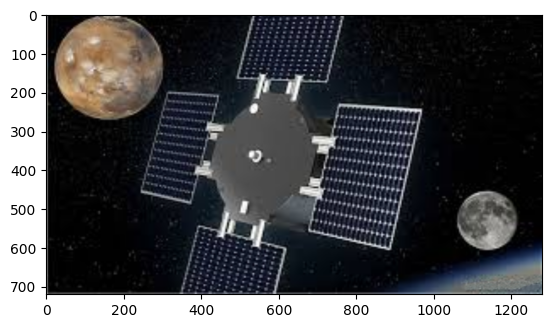

img_resize_3116.png (720, 1280, 4)


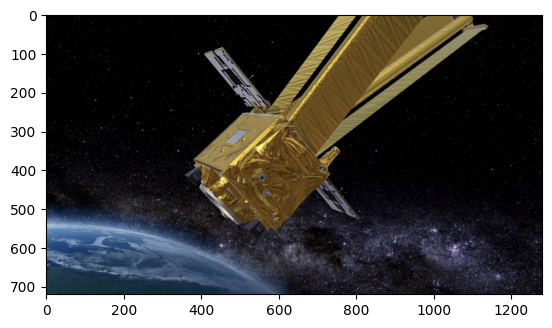

img_resize_3062.png (720, 1280, 4)


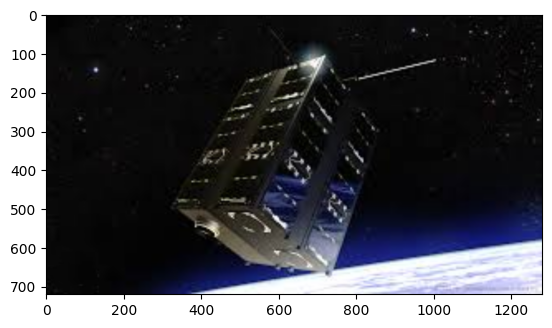

img_resize_2970.png (720, 1280, 4)


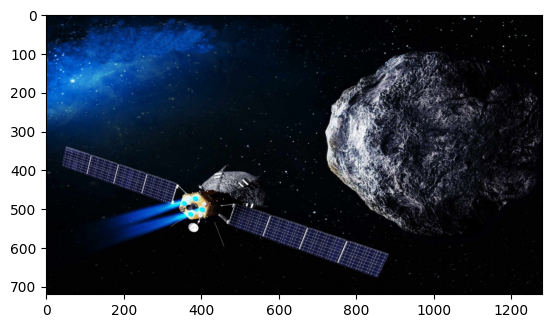

img_resize_2964.png (720, 1280, 4)


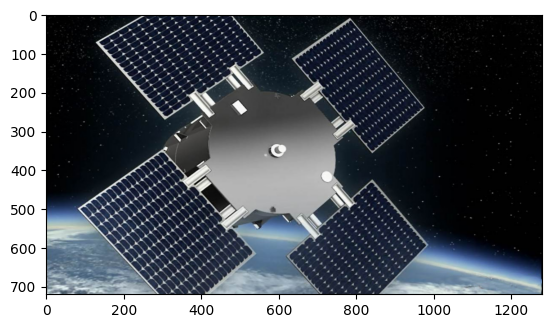

img_resize_2928.png (720, 1280, 4)


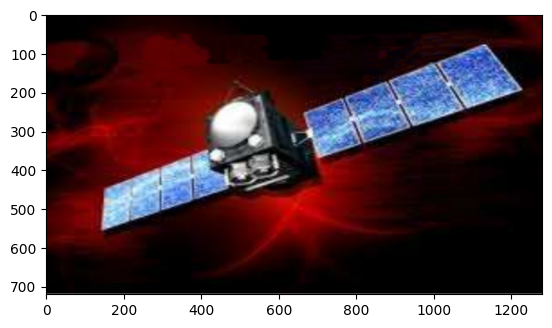

img_resize_2858.png (720, 1280, 4)


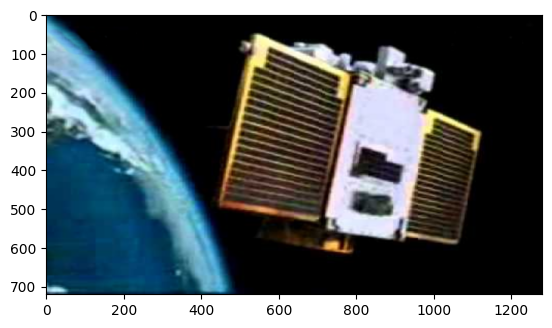

img_resize_2867.png (720, 1280, 4)


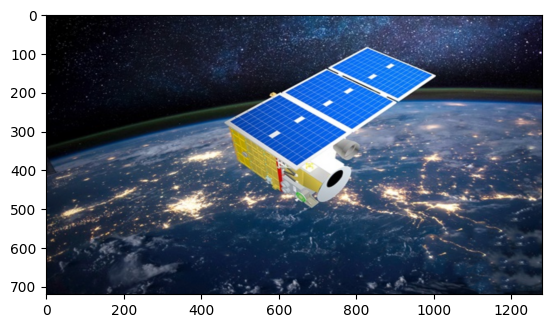

img_resize_3022.png (720, 1280, 4)


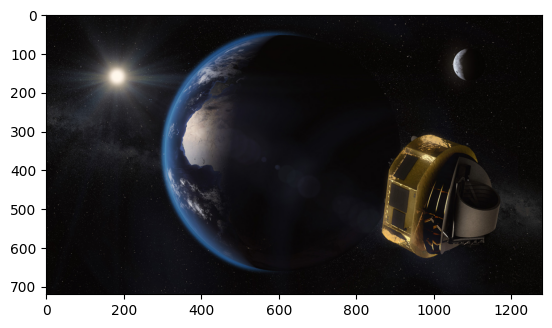

img_resize_2896.png (720, 1280, 4)


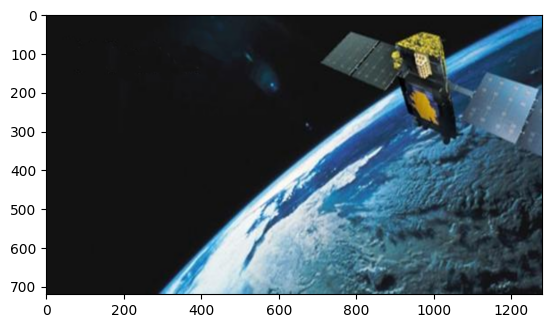

img_resize_3009.png (720, 1280, 4)


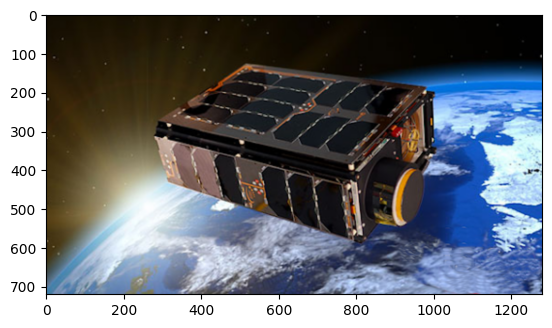

img_resize_2808.png (720, 1280, 4)


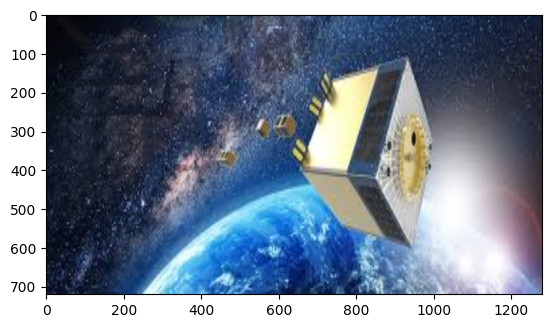

img_resize_3053.png (720, 1280, 4)


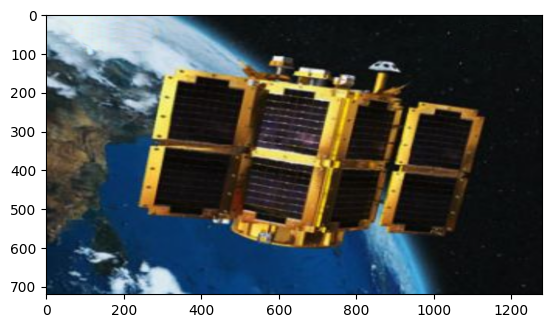

img_resize_2946.png (720, 1280, 4)


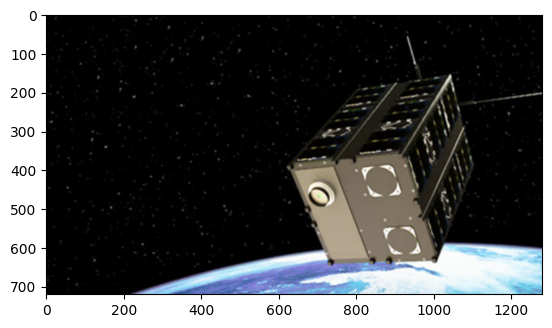

img_resize_1109.png (720, 1280, 4)


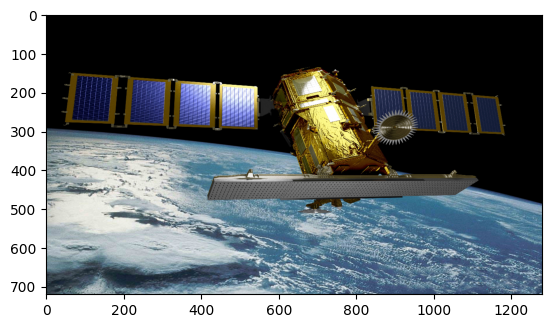

In [33]:
for index, img in enumerate(os.listdir('dataset/images/train/')):
  if img.endswith(".png"):
    img1 = Image.open('dataset/images/train/' + img)
    if np.array(img1).shape[2] != 3:
        print(img ,np.array(img1).shape)
        plt.imshow(img1)
        plt.show()

In [31]:
for index, img in enumerate(os.listdir('dataset/mask/train/')):
  if img.endswith(".png"):
    img1 = Image.open('dataset/mask/train/' + img)
    if np.array(img1).shape[2] != 3:
        print(img ,np.array(img1).shape)

In [21]:
len(train_dataset)

0